In [1]:
!wget https://zenodo.org/record/7041849/files/ReplogleWeissman2022_K562_gwps.h5ad

--2023-06-05 10:49:21--  https://zenodo.org/record/7041849/files/ReplogleWeissman2022_K562_gwps.h5ad
Resolving zenodo.org (zenodo.org)... 188.185.124.72
Connecting to zenodo.org (zenodo.org)|188.185.124.72|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8805466154 (8.2G) [application/octet-stream]
Saving to: ‘ReplogleWeissman2022_K562_gwps.h5ad’

ReplogleWeissman202 100%[===================>]   8.20G  30.4MB/s    in 4m 47s  

2023-06-05 10:54:10 (29.3 MB/s) - ‘ReplogleWeissman2022_K562_gwps.h5ad’ saved [8805466154/8805466154]



In [1]:
import scanpy as sc

In [2]:
adata = sc.read_h5ad('ReplogleWeissman2022_K562_gwps.h5ad')

In [3]:
import numpy as np
# Calculate and plot cumulative distribution function from 1D-samples

def cdf(x):
    x, y = sorted(x), np.arange(len(x)) / len(x)
    return (x, y)

In [4]:
# Look at 10 perturbations
gene_set = adata.obs.perturbation.unique()[:10]

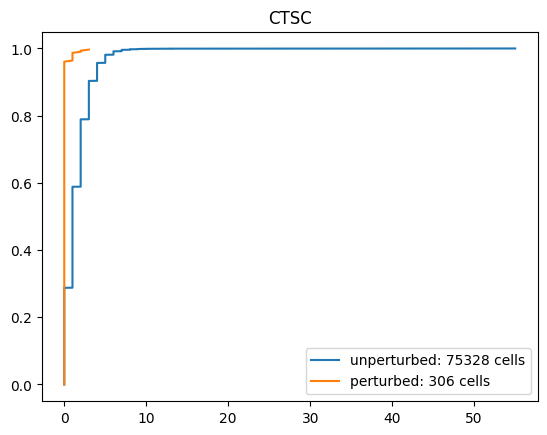

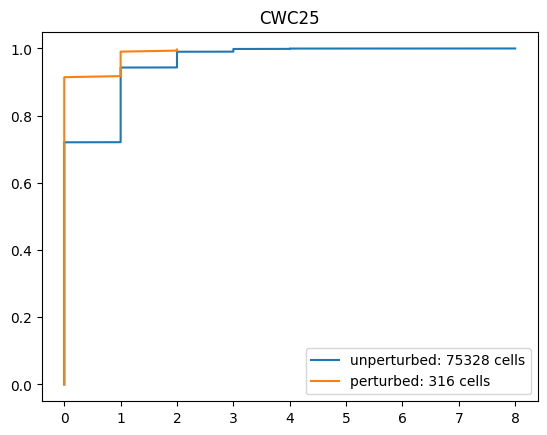

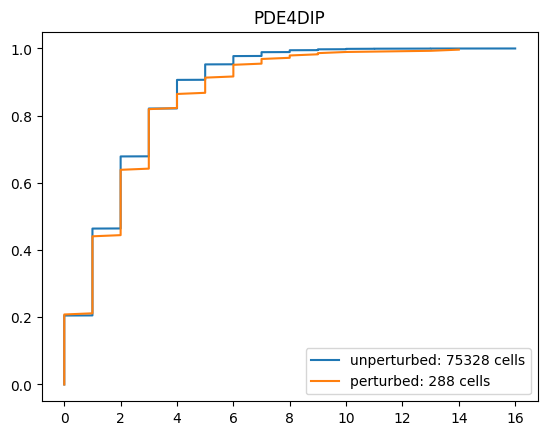

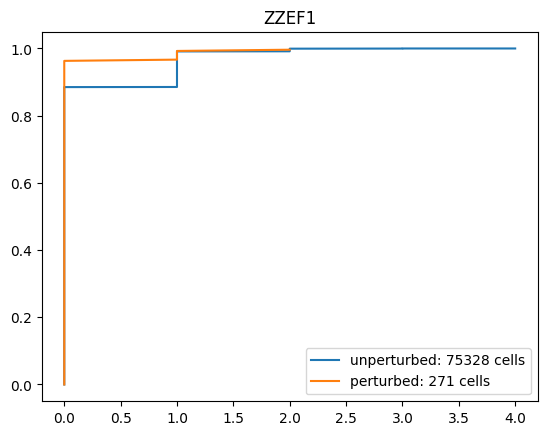

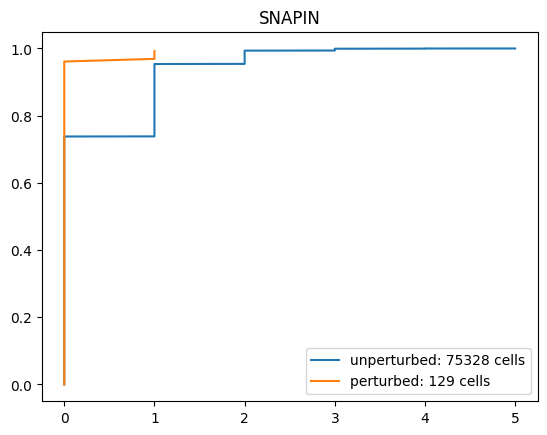

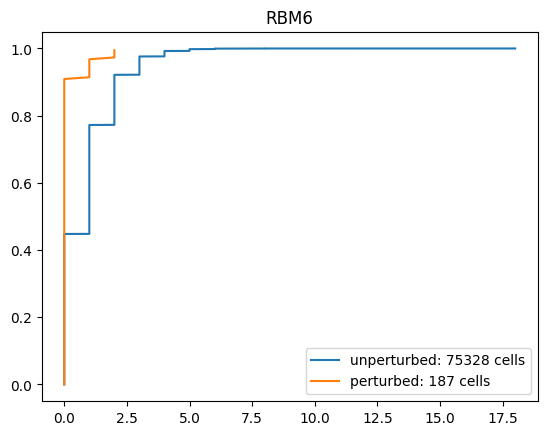

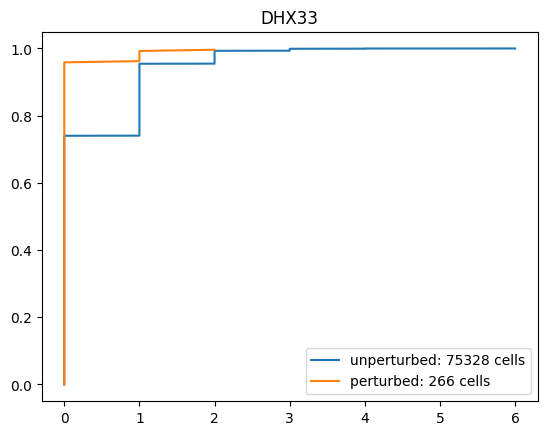

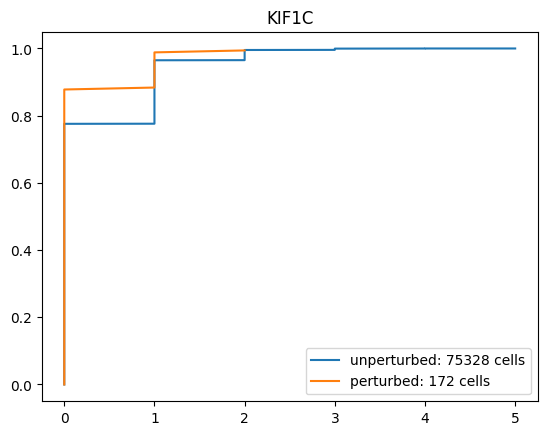

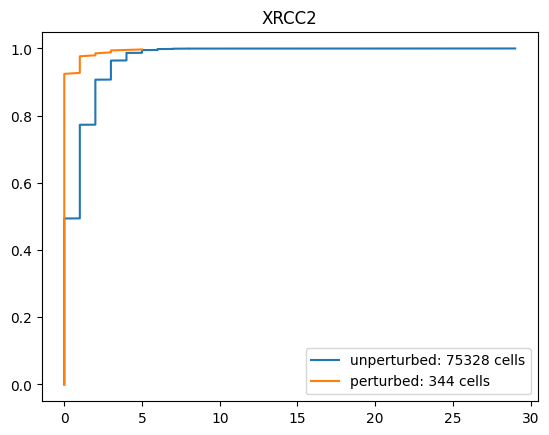

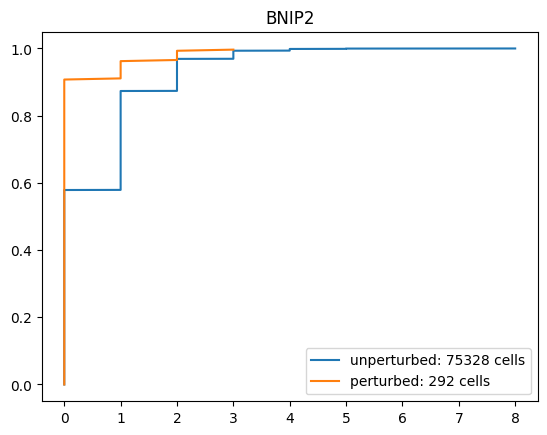

In [5]:
import matplotlib.pyplot as plt

var_names = adata.var_names.to_list()

for gene in gene_set:
    if gene in var_names:
        plt.figure()
        plt.title(gene)
        x_obs, y_obs = cdf(adata[adata.obs['perturbation'] == 'control',gene].X)
        plt.plot(x_obs, y_obs, label = 'unperturbed: %d cells' % len(x_obs))

        x_obs, y_obs = cdf(adata[adata.obs['perturbation'] == gene,gene].X)
        plt.plot(x_obs, y_obs, label = 'perturbed: %d cells' % len(x_obs))

        plt.legend()

        plt.show()